In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
cm = 1/2.54  # centimeters in inches
import matplotlib.lines as mlines

In [2]:
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.0)
data = {}
dataframe = pd.DataFrame()
models = ["mace_ffn", "unimol_ffn", "mace_gnn", "unimol_gnn", "2019_model", "2023_model", "HOSE_code"]
model_type = [("mace", "ffn"),("unimol", "ffn"),("mace", "gnn"), ("unimol", "gnn"), ("literature", "literature"), ("literature", "literature"), ("literature", "literature")]
for model, type in zip(models, model_type):
    df = pd.read_csv(f"{model}/{model}_low_data.csv")
    df["model"] = model
    dataframe = pd.concat([dataframe,
            df], ignore_index=True)


In [3]:
dataframe.dropna()

,Unnamed: 0,num_train_examples,MAE,RMSE,model
0,0,100.0,4.822727,23.530336,mace_ffn
1,1,250.0,3.874067,7.858094,mace_ffn
2,2,500.0,3.509355,43.406723,mace_ffn
3,3,1000.0,3.174248,5.648111,mace_ffn
4,4,2500.0,2.420789,6.319262,mace_ffn
5,5,5000.0,2.110812,3.430945,mace_ffn
6,6,10000.0,1.887635,3.033569,mace_ffn
7,0,100.0,7.361935,11.582787,unimol_ffn
8,1,250.0,5.716979,9.060306,unimol_ffn
9,2,500.0,4.514399,7.303504,unimol_ffn


In [9]:
#Uncomment all lines below for the first plot
pallete = sns.color_palette()
COLORS = {"mace_ffn": pallete[0],
          "mace_gnn": pallete[0],
          "unimol_ffn": pallete[1],
          "unimol_gnn": pallete[1],
#          "2019_model": pallete[3],
#          "2023_model": pallete[2],
#          "HOSE_code": pallete[4]
}
LABELS = {"mace_ffn": "MACE FFN",
          "mace_gnn": "MACE GNN",
          "unimol_ffn": "Uni-Mol FFN",
          "unimol_gnn": "Uni-Mol GNN",
          "2019_model": "2019 Model",
          "2023_model": "2023 Model",
          "HOSE_code": "HOSE code"}
STYLE = {"mace_ffn": "dotted",
          "mace_gnn": "solid",
          "unimol_ffn": "dotted",
          "unimol_gnn": "solid",
#          "2019_model": "solid",
#          "2023_model": "solid",
#          "HOSE_code": "dashed"
          }
MARKERS = {"mace_ffn": "o",
          "mace_gnn": "o",
          "unimol_ffn": "s",
          "unimol_gnn": "s",
          "2019_model": "^",
          "2023_model": "^",
          "HOSE_code": "*"}

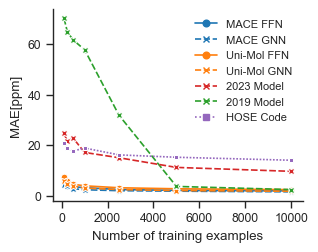

In [8]:
f, ax = plt.subplots(figsize=(8.3*cm, 8.3*cm*0.8))
ax = sns.lineplot(dataframe, x="num_train_examples", y="MAE", hue=map(COLORS.get,dataframe["model"]), style=map(STYLE.get,dataframe["model"]), markers=True)
ax.set_ylabel("MAE[ppm]")
ax.set_xlabel("Number of training examples")
ax.legend(fontsize="small");
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
patches = [mlines.Line2D([], [], color=pallete[0], marker='o', label='MACE FFN'),
           mlines.Line2D([], [], color=pallete[0], marker='x', label='MACE GNN',linestyle="dashed"),
           mlines.Line2D([], [], color=pallete[1], marker='o', label='Uni-Mol FFN'),
           mlines.Line2D([], [], color=pallete[1], marker='x', label='Uni-Mol GNN',linestyle="dashed"),
           mlines.Line2D([], [], color=pallete[3], marker='x', label='2023 Model',linestyle="dashed"),
           mlines.Line2D([], [], color=pallete[2], marker='x', label='2019 Model',linestyle="dashed"),
           mlines.Line2D([], [], color=pallete[4], marker='s', label='HOSE Code',linestyle="dotted"),]
ax.legend(handles=patches,fontsize="small",edgecolor="white",)
sns.despine()
f.tight_layout()
f.savefig(fname="low_data_all.pdf",dpi=800)
f.savefig(fname="low_data_all.tiff",dpi=800)

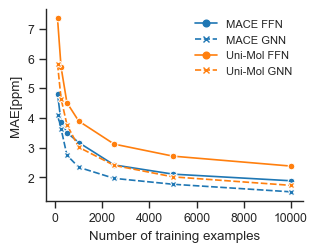

In [10]:
our_data = dataframe[dataframe["model"].isin(["mace_ffn", "mace_gnn", "unimol_ffn", "unimol_gnn"])]
f, ax = plt.subplots(figsize=(8.3*cm, 8.3*cm*0.8))
ax = sns.lineplot(our_data, x="num_train_examples", y="MAE", hue=map(COLORS.get,our_data["model"]), style=map(STYLE.get,our_data["model"]), markers=True)
ax.set_ylabel("MAE[ppm]")
ax.set_xlabel("Number of training examples")
ax.legend(fontsize="small");
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
patches = [mlines.Line2D([], [], color=pallete[0], marker='o', label='MACE FFN'),
           mlines.Line2D([], [], color=pallete[0], marker='x', label='MACE GNN',linestyle="dashed"),
           mlines.Line2D([], [], color=pallete[1], marker='o', label='Uni-Mol FFN'),
           mlines.Line2D([], [], color=pallete[1], marker='x', label='Uni-Mol GNN',linestyle="dashed"),]
ax.legend(handles=patches,fontsize="small",edgecolor="white",)
sns.despine()
f.tight_layout()
f.savefig(fname="low_data_our.pdf",dpi=800)
f.savefig(fname="low_data_our.tiff",dpi=800)

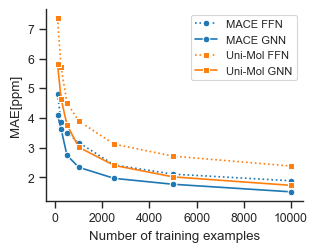

In [ ]:
f, ax = plt.subplots(figsize=(8.3*cm, 8.3*cm*0.8))
for model in sorted(models)[-4:]:
    sns.lineplot(dataframe[dataframe["model"] == model], x="num_train_examples", y="MAE", color=COLORS[model], marker=MARKERS[model], linestyle=STYLE[model], label=LABELS[model])
ax.set_ylabel("MAE[ppm]")
ax.set_xlabel("Number of training examples")
ax.legend(fontsize="small");
sns.despine()
f.tight_layout()
#f.savefig(fname="low_data_all.png",dpi=800)

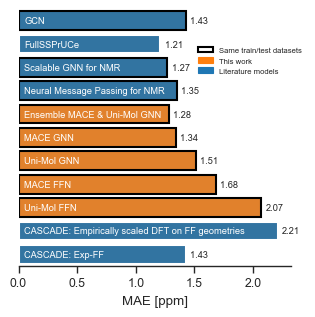

In [ ]:
import matplotlib.patches as mpatches
models_literature = {"GCN": 1.43,
                    "FullSSPrUCe": 1.21,
                    "Scalable GNN for NMR": 1.27,
                    "Neural Message Passing for NMR": 1.35,
                    "Ensemble MACE & Uni-Mol GNN": 1.28,
                    "MACE GNN":1.34,
                    "Uni-Mol GNN": 1.51,
                    "MACE FFN": 1.68, 
                    "Uni-Mol FFN": 2.07,
                    "CASCADE: Empirically scaled DFT on FF geometries": 2.21,
                    "CASCADE: Exp-FF": 1.43}
EDGE_COLORS = ["black", "white"] + 7*["black"] + 2* ["white"]
EDGE_COLORS = dict(zip(models_literature.keys(), EDGE_COLORS))
f, ax = plt.subplots(figsize=(8.3*cm, 8.3*cm))
sns.barplot(y=list(models_literature.keys()),x=list(models_literature.values()),orient="h",legend=False,hue=[False]*4 + [True]*5 + [False]*2 )
ax.set(yticklabels=[],yticks=[])
for rect, x in zip(sorted(list(ax.patches),key=lambda x : x.get_y()),list(models_literature.keys())):
    ax.text(0.05, rect.get_y() + rect.get_height()/2, x,
                ha='left', va='center', color="white", fontsize="x-small")
    rect.set(edgecolor=EDGE_COLORS[x], linewidth=1.5)
ax.set_xlabel("MAE [ppm]");
ax.bar_label(ax.containers[0], padding=3, fontsize="x-small");
ax.bar_label(ax.containers[1], padding=3, fontsize="x-small");
patches = [mpatches.Patch(label='Same train/test datasets',edgecolor="black",linewidth=1.5,facecolor="white"),
           mpatches.Patch(color='#ff7f0e', label='This work'),
           mpatches.Patch(color='#1f77b4', label='Literature models'),
           ]
ax.legend(handles=patches,fontsize="xx-small",edgecolor="white", bbox_to_anchor=(0.85,0.80), loc="center")
sns.despine(left=True,bottom=False)
ax.set_xbound(lower=0.0)
f.tight_layout()
f.savefig(fname="mae_comparison.pdf",dpi=800)
f.savefig(fname="mae_comparison.tiff",dpi=800)